In [1]:
# Configuración del entorno y del paquete ---

from pathlib import Path
import sys


# Definimos la ruta raíz del proyecto y añadimos 'src' al sys.path
NOTEBOOK_DIR = Path.cwd()
PROJECT_DIR = NOTEBOOK_DIR.parent
SRC = PROJECT_DIR / "src"

if SRC.exists() and str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))

print("Directorio del notebook:", NOTEBOOK_DIR)
print("Raíz del proyecto:", PROJECT_DIR)
print("Ruta añadida a sys.path:", SRC if SRC.exists() else "No se encontró 'src'")


Directorio del notebook: D:\zxyua\OneDrive\UCM_Master_BDDE\Modulo_1_Python\Tarea programación avanzada en python\traficFines\notebooks
Raíz del proyecto: D:\zxyua\OneDrive\UCM_Master_BDDE\Modulo_1_Python\Tarea programación avanzada en python\traficFines
Ruta añadida a sys.path: D:\zxyua\OneDrive\UCM_Master_BDDE\Modulo_1_Python\Tarea programación avanzada en python\traficFines\src


In [2]:
# Importación del paquete
import matplotlib.pyplot as plt
from traficFines.madridFines import MadridFines, MadridError,get_url
from traficFines.cache import CacheURL, CacheError, Cache
import traficFines.madridFines as mfmod

print("Importaciones correctas.")

Importaciones correctas.


In [3]:
# --- BLOQUE 2: Creación del objeto con caché ---
mf = MadridFines(app_name="traficFines", obsolescence=30)

print("Objeto 'MadridFines' creado correctamente con caché de 30 días.")

Objeto 'MadridFines' creado correctamente con caché de 30 días.


In [4]:
urls = get_url(158, 407)
print("\nURLs válidas encontradas:")
for u in urls:
    print(u)

Intentando descargar: https://datos.madrid.es/egob/catalogo/210104-158-multas-circulacion-detalle.csv
Error de conexión para código 158: HTTPSConnectionPool(host='datos.madrid.es', port=443): Read timed out. (read timeout=10)
Intentando descargar: https://datos.madrid.es/egob/catalogo/210104-159-multas-circulacion-detalle.csv
!!!No se encontró CSV para código 159 (status 404).
Intentando descargar: https://datos.madrid.es/egob/catalogo/210104-160-multas-circulacion-detalle.csv
CSV encontrado: https://datos.madrid.es:443/datosabiertos/MULTAS/2017/06/201706_agrupadas.csv
Intentando descargar: https://datos.madrid.es/egob/catalogo/210104-161-multas-circulacion-detalle.csv
!!!No se encontró CSV para código 161 (status 404).
Intentando descargar: https://datos.madrid.es/egob/catalogo/210104-162-multas-circulacion-detalle.csv
CSV encontrado: https://datos.madrid.es:443/datosabiertos/MULTAS/2017/07/201707_detalle.csv
Intentando descargar: https://datos.madrid.es/egob/catalogo/210104-163-multa

In [5]:
# 1) URL 12/2024
DEC_2024_URL = "https://datos.madrid.es:443/egobfiles/MANUAL/210104/202412detalle.csv"


### CacheURL

In [6]:
# 2) Instanciar la caché (usa ~/.my_cache/traficFines por defecto)
cu = CacheURL(app_name="traficFines", obsolescence=7)

# 2.1) Primera obtención → descarga y guarda en caché
csv_text_1 = cu.get(DEC_2024_URL)
print("Longitud texto descargado:", len(csv_text_1))
print("Primeras 300 letras:\n", csv_text_1[:300])

Longitud texto descargado: 70444164
Primeras 300 letras:
 CALIFICACION;LUGAR;MES;ANIO;HORA;IMP_BOL;DESCUENTO; PUNTOS;DENUNCIANTE;HECHO-BOL;VEL_LIMITE;VEL_CIRCULA ;COORDENADA-X;COORDENADA-Y                                                                                                                                                      

LEVE      ;CL CLAR


In [7]:
# 2.2) Comprobar existencia y edad en caché
csv_text = cu.get(DEC_2024_URL)
print("¿Existe en caché?:", cu.exists(DEC_2024_URL))
print("Edad (ms):", cu.how_old(DEC_2024_URL))

¿Existe en caché?: True
Edad (ms): 3397756.5530000003


In [8]:
# 2.3) Mostrar ruta de la caché y el nombre de fichero (hash)
cache_dir = Path(cu.cache_dir)
cache_key = cu._key(DEC_2024_URL)  # método interno para ver el nombre hash
print("Carpeta de caché:", cache_dir)
print("Fichero en caché (hash):", cache_key)
print("Ruta completa:", cache_dir / cache_key)


Carpeta de caché: C:\Users\zxyua\.my_cache\traficFines
Fichero en caché (hash): cf0c8e141ba510dafe584887cca32494.txt
Ruta completa: C:\Users\zxyua\.my_cache\traficFines\cf0c8e141ba510dafe584887cca32494.txt


In [9]:
# 2.4) Segunda obtención → venir de caché (mismo contenido)
csv_text_2 = cu.get(DEC_2024_URL)
print("¿Texto igual anterior?:", csv_text_2 == csv_text_1)

¿Texto igual anterior?: True


In [10]:
# 2.5) Borrar la entrada concreta y volver a obtener (descarga de nuevo)
cu.delete(DEC_2024_URL)
print("¿Existe tras borrar?:", cu.exists(DEC_2024_URL))
csv_text_3 = cu.get(DEC_2024_URL, timeout=30)
print("¿Re-descargado correctamente?:", len(csv_text_3) > 0)

¿Existe tras borrar?: False
¿Re-descargado correctamente?: True


### madridFines

In [11]:
# 1) Parchea get_url
_original_get_url = mfmod.get_url
mfmod.get_url = lambda year, month: DEC_2024_URL
print("get_url parcheado para dic-2024.")

get_url parcheado para dic-2024.


In [12]:
# 2) Prueba de la descarga/cache básica
cu = mf.cacheurl
csv_text = cu.get(DEC_2024_URL)
print("Descargado OK. Longitud:", len(csv_text))
print(csv_text[:300])

Descargado OK. Longitud: 70444164
CALIFICACION;LUGAR;MES;ANIO;HORA;IMP_BOL;DESCUENTO; PUNTOS;DENUNCIANTE;HECHO-BOL;VEL_LIMITE;VEL_CIRCULA ;COORDENADA-X;COORDENADA-Y                                                                                                                                                      
LEVE      ;CL CLAR


In [13]:
# 3) Usar load() (usa CacheURL por debajo y lee a DataFrame)

df_raw = MadridFines.load(2024, 12, mf.cacheurl)
print("load() OK → shape:", df_raw.shape)
df_raw.head(3)


load() OK → shape: (249801, 14)


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y             
0,LEVE,CL CLARA DEL REY 36,12,2024,20.23,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,            
1,LEVE,CL CLARA DEL REY 28,12,2024,20.27,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,            
2,GRAVE,CL CANILLAS 63,12,2024,20.45,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,,,,            


In [14]:
# 4) clean() — normalizar columnas, tipos y FECHA
df_clean = df_raw.copy()
MadridFines.clean(df_clean)
print("clean() OK — columnas (primeras 20):")
print(df_clean.columns.tolist()[:20])
df_clean.head(3)


clean() OK — columnas (primeras 20):
['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO', 'PUNTOS', 'DENUNCIANTE', 'HECHO_BOL', 'VEL_LIMITE', 'VEL_CIRCULA', 'COORDENADA_X', 'COORDENADA_Y', 'FECHA']


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO_BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y,FECHA
0,LEVE,CL CLARA DEL REY 36,12,2024,20.23,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA.,NaN,NaN,NaN,NaN,2024-12-01 20:00:00
1,LEVE,CL CLARA DEL REY 28,12,2024,20.27,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",NaN,NaN,NaN,NaN,2024-12-01 20:00:00
2,GRAVE,CL CANILLAS 63,12,2024,20.45,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,NaN,NaN,NaN,NaN,2024-12-01 20:00:00


In [15]:
# 5) add() — carga y limpia automáticamente el CSV de diciembre 2024
mf2 = MadridFines(app_name="traficFines", obsolescence=30)
mf2.add(2024, 12)
print("add(2024,12) OK — meses cargados:", mf2.loaded)
print("Shape de mf2.data:", mf2.data.shape)
mf2.data.head(3)


add(2024,12) OK — meses cargados: [(12, 2024)]
Shape de mf2.data: (249801, 15)


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO_BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y,FECHA
0,LEVE,CL CLARA DEL REY 36,12,2024,20.23,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA.,NaN,NaN,NaN,NaN,2024-12-01 20:00:00
1,LEVE,CL CLARA DEL REY 28,12,2024,20.27,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",NaN,NaN,NaN,NaN,2024-12-01 20:00:00
2,GRAVE,CL CANILLAS 63,12,2024,20.45,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,NaN,NaN,NaN,NaN,2024-12-01 20:00:00


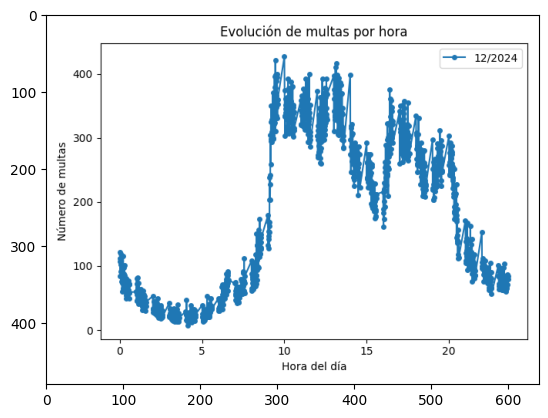

In [16]:
# 6) fines_hour() — gráfico de distribución de multas por hora
tmp_fig = Path("evolucion_multas.png")
mf2.fines_hour(tmp_fig)
img = plt.imread(tmp_fig)
plt.imshow(img)
plt.show()


In [17]:
# 7) fines_calification() — tabla cruzada (ANIO, MES) × CALIFICACION
tabla_calif = mf2.fines_calification()
print("fines_calification() OK — shape:", tabla_calif.shape)
tabla_calif.head(10)


fines_calification() OK — shape: (1, 3)


,CALIFICACION,GRAVE,LEVE,MUY GRAVE
MES,ANIO,,,
12,2024,157605,91388,808


In [18]:
# 8) total_payment() — totales MIN (50%) y MAX (100%) por (ANIO, MES)
totales = mf2.total_payment()
print("total_payment() OK — shape:", totales.shape)
totales.head(3)


total_payment() OK — shape: (1, 4)


,ANIO,MES,TOTAL_MIN,TOTAL_MAX
0,2024,12,18502615.0,37005230.0
